![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

We have seen that Sliding Window Technique is computationally expensive and inefficient due to the very high number of bounding box positions. Hence, in order to speed up the object detection, we have two options:

1. Use a shallow network with less no of parameters $\implies$ CNN model may not perform well
2. Reduce the no of bounding boxes
    - No need to pass bounding boxes with "Background" class (since CNN do not learn anything)
    - No need for duplicate bounding boxes for same object

**RCNN (Region-based Convolutional Neural Networks)** tries to get only the regions of image in which there is a high probability of an object. Thus, RCNN reduces the no of regions that we pass into the CNN.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Object Detection with RCNN

R-CNN (Region-based Convolutional Neural Networks) is a pioneering deep learning method for object detection that was introduced by Ross Girshick, Jeff Donahue, Trevor Darrell, and Jitendra Malik in 2014. It brought significant improvements to object detection by combining region proposals with Convolutional Neural Networks (CNNs). The main idea is to generate region proposals, use a CNN to extract features from each proposal, and then classify these features into object categories or background.

## 1. Steps in R-CNN

1. **Region Proposal Generation:**

    - **Selective Search:** R-CNN uses a region proposal algorithm called Selective Search to generate around 2000 region proposals (bounding boxes) from an input image. Selective Search combines the advantages of both exhaustive search and segmentation to find regions that are likely to contain objects.

2. **Feature Extraction:**

    - Each of the 2000 region proposals is then warped into a fixed-size (e.g., 227x227) image patch.
    - These patches are fed into a pre-trained CNN (like AlexNet) to extract a fixed-length feature vector for each region. The CNN acts as a feature extractor.

3. **Classification:**

    - The extracted features are then passed to a set of class-specific linear SVMs (Support Vector Machines) to classify each region proposal into one of the object classes or background (non-object).

4. **Bounding Box Regression:**

    - To refine the bounding box coordinates, a bounding box regressor is trained to predict more accurate bounding boxes for each region proposal. This step improves the localization accuracy of the detected objects.

## 2. Detailed Workflow

1. **Input Image:**

    - The process starts with an input image.

2. **Region Proposal:**

    - Use Selective Search to generate around 2000 region proposals. Each proposal is a potential region that might contain an object.

3. **Warping Regions:**

    - Each region proposal is resized to a fixed size required by the CNN (e.g., 227x227 pixels).

4. **CNN Feature Extraction:**

    - Pass each resized region proposal through a CNN. The CNN extracts high-level features from the region. The output from a fully connected layer of the CNN is used as the feature vector.

5. **Classification with SVM:**

    - Each feature vector is classified using class-specific linear SVMs. Each SVM is trained to detect a specific class, and there is an additional SVM to detect the background.

6. **Bounding Box Regression:**

    - For each classified region, a bounding box regressor adjusts the proposed bounding box coordinates to better fit the object.


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Region Proposal Generation using Selective Search Algorithm

The problem of object localization is the most difficult part of object detection. One approach is that we use sliding window of different size to locate objects in the image. This approach is called Exhaustive Search. This approach is computationally very expensive as we need to search for object in thousands of windows even for small image size. Some optimization has been done such as taking window sizes in different ratios (instead of increasing it by some pixels). But even after this due to number of windows it is not very efficient.

## 1. Selective Search Algorithm Workflow

Selective Search algorithm uses both Exhaustive Search and Segmentation for generating region proposals. Its workflow is as below:

### 1. Generate initial sub-segmentation of input image

Uses the method described by *Felzenszwalb et al* in his paper "Efficient Graph-Based Image Segmentation".

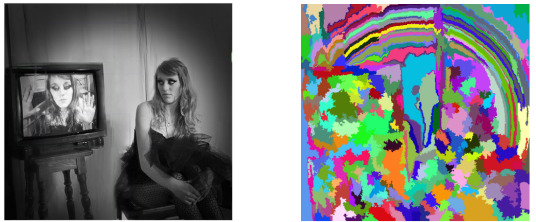

In [ ]:
# Generate initial sub-segmentation of input image

from IPython import display
display.Image("data/images/CV_08_RCNN-01.jpg")

### 2. Recursively combine the smaller similar regions into larger ones

We use Greedy algorithm to combine similar regions to make larger regions. The algorithm is written below:

1. From set of regions, choose two that are most similar.
2. Combine them into a single, larger region.
3. Repeat the above steps for multiple iterations.

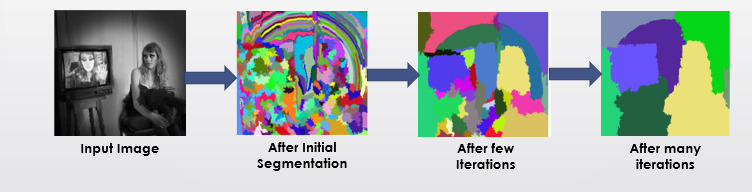

In [ ]:
# Recursively combine the smaller similar regions into larger ones

from IPython import display
display.Image("data/images/CV_08_RCNN-02.jpg")

### 3. Use the segmented region proposals to generate candidate object locations

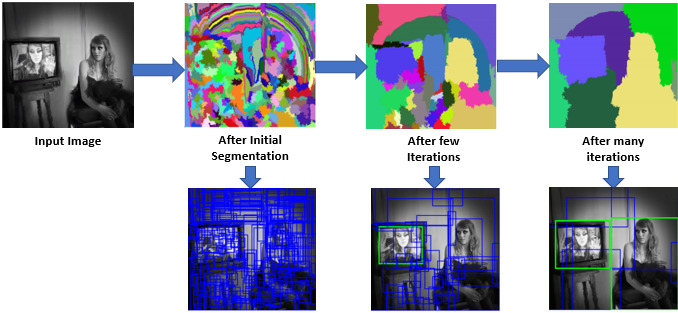

In [ ]:
# Use the segmented region proposals to generate candidate object locations

from IPython import display
display.Image("data/images/CV_08_RCNN-03.jpg")

Selective Search Algorithm is described in a nutshell in the following figure:

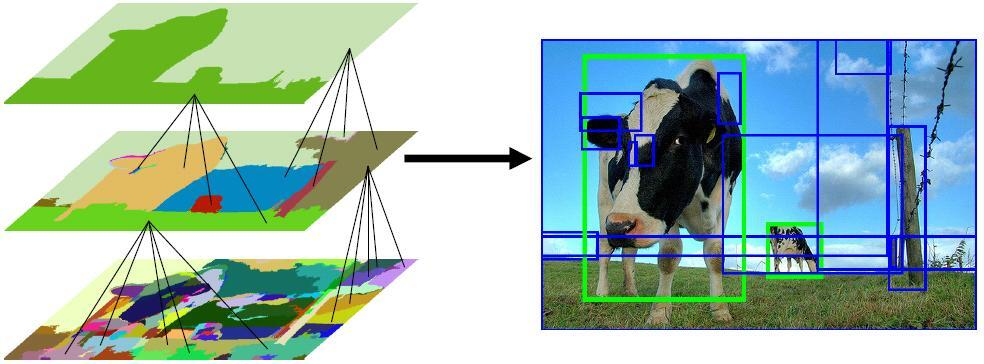

In [ ]:
# Selective Search Algorithm in a nutshell

from IPython import display
display.Image("data/images/CV_08_RCNN-04.jpg")

**Note**

The Selective Search paper considers five types of similarity when combining the initial small segmentation into larger ones. These similarities are:

1. Color Similarity
2. Texture Similarity
3. Size Similarity
4. Shape or Fill Similarity
5. Linear combination of above measures

## 2. Measuring Performance of Selective Search Algorithm

To measure the performance of Selective Search, the "Selective Search for Object Recognition" paper describes an evaluation parameter known as MABO (Mean Average Best Overlap). There are two versions of Selective Search - Fast and Quality. The difference between them is Quality Selective Search generated much more bounding boxes than Fast Selective Search and so takes more time to compute but have higher recall, ABO(Average Best Overlap) and MABO (Mean Average Best overlap).

**Note**

Selective Search is widely used in early state-of-the-art object detection architectures such as R-CNN, Fast R-CNN etc. However, it takes a lot of time to generate region proposals which is not good enough for a real-time object detection system.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Warping Regions: Reshaping and Dilation

After obtaining region proposals from the Selective Search algorithm, each proposed region (or bounding box) is processed to prepare it for feature extraction using a Convolutional Neural Network (CNN). This involves reshaping and dilation.

- **Reshaping**

    Reshaping is the process of resizing each region proposal to a fixed size required by the CNN. Here's how it works:

    1. **Variable Size Regions:** Region proposals generated by Selective Search come in various sizes and aspect ratios. However, CNNs typically require input images of a fixed size (e.g., 227x227 pixels for AlexNet).

    2. **Uniform Input Size:** To ensure that all region proposals can be fed into the CNN, each one needs to be resized to this fixed size. This process is known as reshaping. For example, a region proposal of size 150x300 pixels might be resized to 227x227 pixels.

    3. **Aspect Ratio Distortion:** During reshaping, the aspect ratio (the ratio of width to height) of the original region may be distorted. This means that an object might look stretched or squished in the resized image. While this distortion is not ideal, the CNN is trained to handle such variations to some extent.

- **Dilation**

    Dilation is a technique used to ensure that the resized region proposal captures enough context around the object. Here's how it works:

    1. **Contextual Information:** When a region proposal is tightly cropped around an object, it may miss important contextual information from the surrounding area. This context can be crucial for accurate object detection.

    2. **Padding the Region:** To address this, the region proposal can be dilated, or padded, by adding some extra pixels around the bounding box. This padding effectively enlarges the region slightly, capturing more of the surrounding area.

    3. **Maintaining Proportions:** After padding, the region proposal is then resized (reshaped) to the fixed input size required by the CNN. The additional context provided by dilation helps the CNN to better recognize and classify the object within the region.

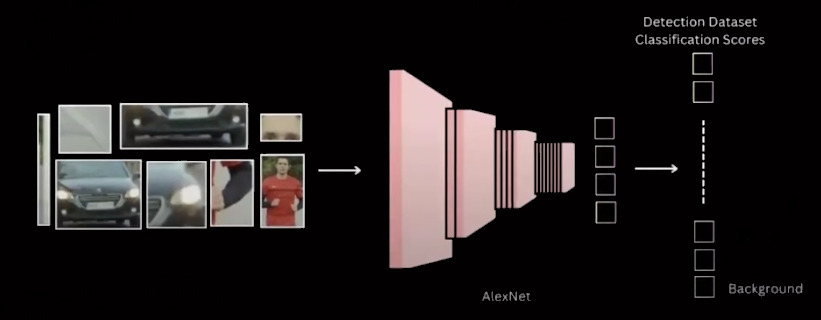

In [ ]:
# Warping Regions: Reshaping and Dilation

from IPython import display
display.Image("data/images/CV_08_RCNN-05.jpg")

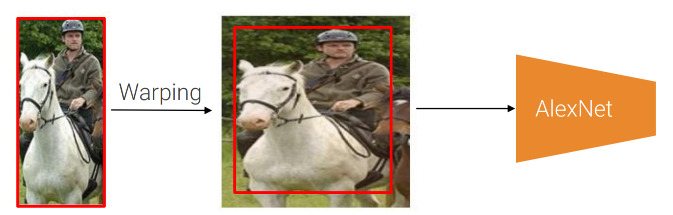

In [ ]:
# Warping Regions: Reshaping and Dilation

from IPython import display
display.Image("data/images/CV_08_RCNN-06.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. IOU (Intersection Over Union)

## 1. Definition of IOU

Many of the proposed regions contain partial objects. They may contain multiple partial objects too. Hence, in order to label the classes in proposed regions, we use a measure called IOU.

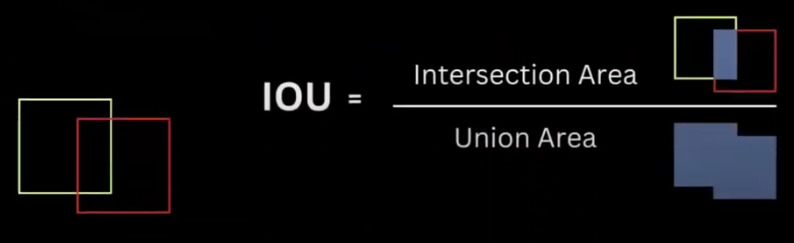

In [1]:
# IOU

from IPython import display
display.Image("data/images/CV_08_RCNN-07.jpg")

- IOU value varies from 0 to 1
- IOU = 1 $\implies$ Both boxes are same (100 % overlap)
- IOU = 0 $\implies$ Both boxes are disjointed (0 % overlap)

## 2. Multiple Ground Truths for same Bounding Box

When there are multiple Ground Truths for same Bounding Box, we label it as the class with maximum IOU.

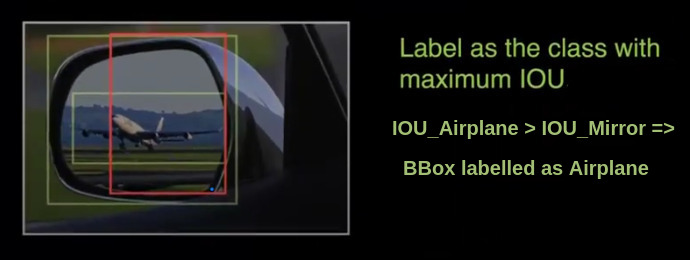

In [2]:
# Multiple Ground Truths for same Bounding Box

from IPython import display
display.Image("data/images/CV_08_RCNN-08.jpg")

## 3. Reducing no of Bounding Boxes using IOU measure

1. Select only object bounding boxes with IOU > 0.5
2. Select some random samples of background bounding boxes with IOU < 0.3 typically
3. Combine these bounding boxes as a batch to pass to the model
4. These boxes will be warped first and then passed to the model for fine-tuning

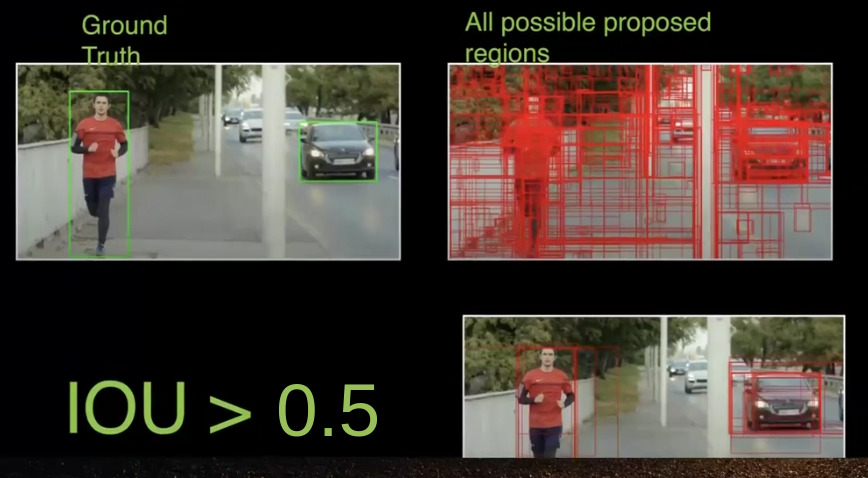

In [3]:
# Reducing no of Bounding Boxes using IOU measure

from IPython import display
display.Image("data/images/CV_08_RCNN-09.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Evolution of RCNN Architecture

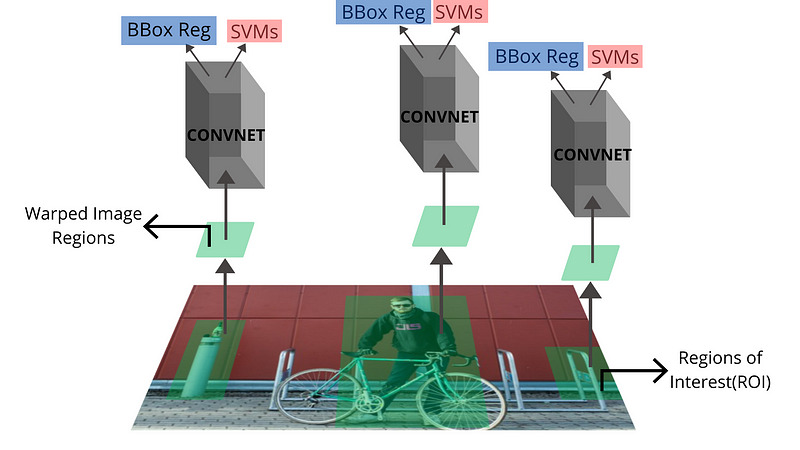

In [3]:
# RCNN Architecture

from IPython import display
display.Image("data/images/CV_08_RCNN-10.jpg")

## 1. First RCNN Model

At first, R-CNN gave an accuracy of 44%, which was a bit low. But after a few changes, it raised to 66%. Let's look at how the accuracy was increased.

The very first architecture did not include a BBox Regressor since they thought it would be unnecessary as the input would already be a cropped image.

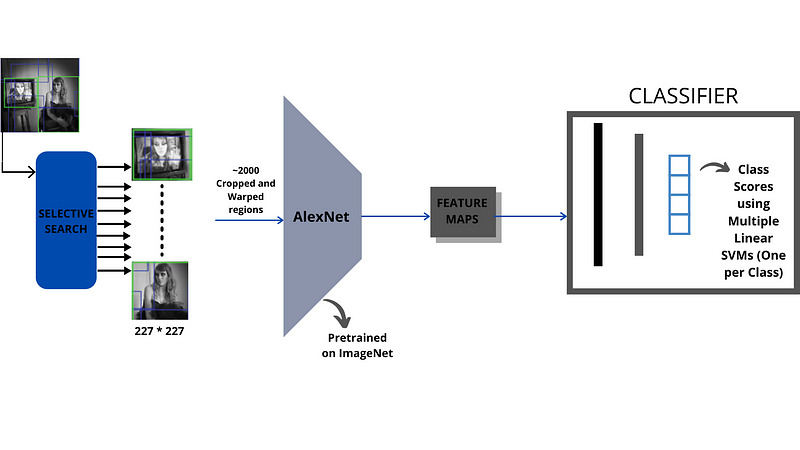

In [4]:
# First RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-11.jpg")

With the above architecture, we would get an accuracy of **44.7%**. The AlexNet used is pre-trained on the ImageNet dataset which contains around 14 million images with 1000 classes. But why do we get such a low accuracy even when it is trained on such a huge dataset?

The reason here is that the images in the ImageNet dataset would be of a specific aspect ratio and the cropped and warped images the network receives from selective search has a different aspect ratio. This means that in general, the network would think that the image of a person would be tall and thin. But when we warp the region proposal to the required size, the image gets stretched and it's aspect ratio gets disturbed. This accounts for some loss of accuracy.

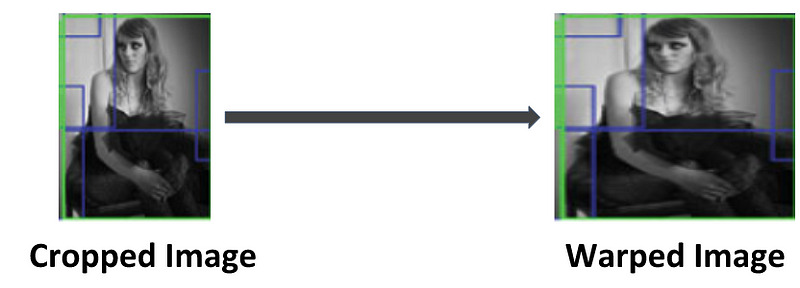

In [5]:
# Change in Aspect Ratio after Warping

from IPython import display
display.Image("data/images/CV_08_RCNN-12.jpg")

## 2. Second RCNN Model

As discussed, you can look at the aspect ratios of both the cropped and warped images. The warped image looks stretched. In this way, the warped image looks so unnatural distorting the aspect ratio of the image. So, to counter this issue, fine-tuning of the network with region proposals is proposed. But, this training phase includes a softmax classifier instead of an SVM and the loss function would be the Cross-Entropy loss. There is one SVM allocated for one class and the SVMs are trained offline using the stored feature maps. Each SVM is trained by providing the correct and wrong proposals for that class.

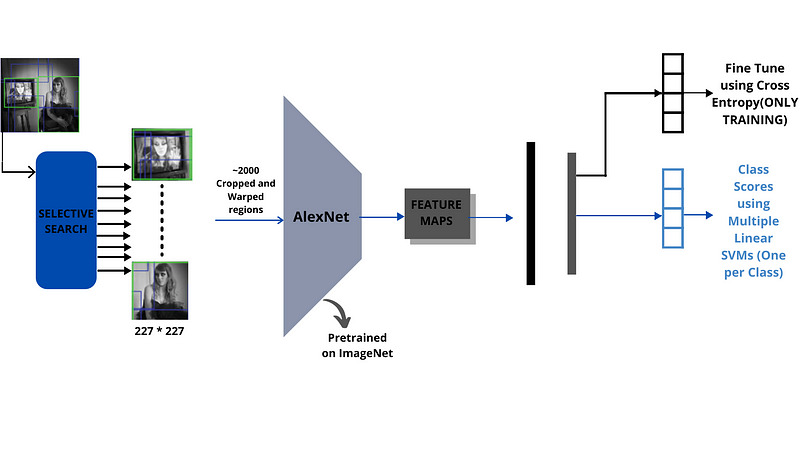

In [6]:
# Second RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-13.jpg")

So, when we fine-tune the network, we update weights both in the convolution and fully connected layers. This resulted in a jump of 10% in the accuracy leading to **54.2%**.

## 3. Final RCNN Model

After the addition of fine-tuning, it is also experimentally found out that including a bounding box regressor resulted in a much better accuracy as it tightened the bounding boxes more accurately than before. It included only one fully connected layer rather than two. This resulted in a further jump of accuracy leading to **58.5%**. Using VGGNet in place of AlexNet which is much deeper led to the best performing model of R-CNN with an accuracy of **66%**.

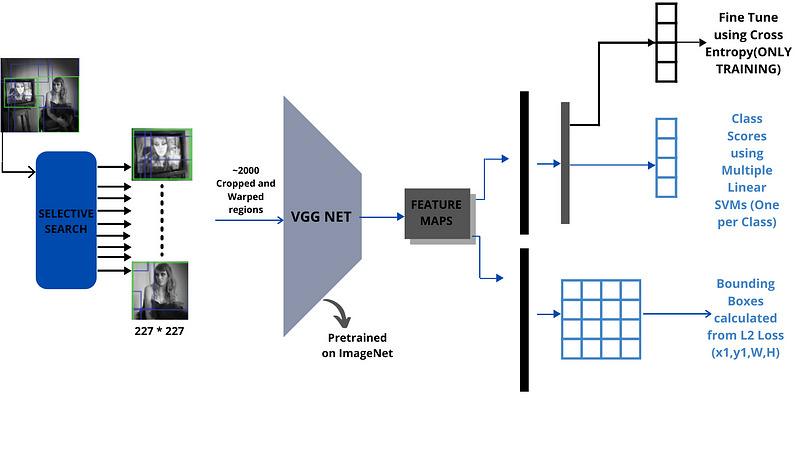

In [8]:
# Final RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-14.jpg")

This is a high-level diagram of an R-CNN. Further, many improvements and experiments are done by including and removing the fully connected layers with and without fine-tuning. It is observed that while fine-tuning more number of weights were altered in the fully connected layers rather than the convolution layers which was an interesting observation.

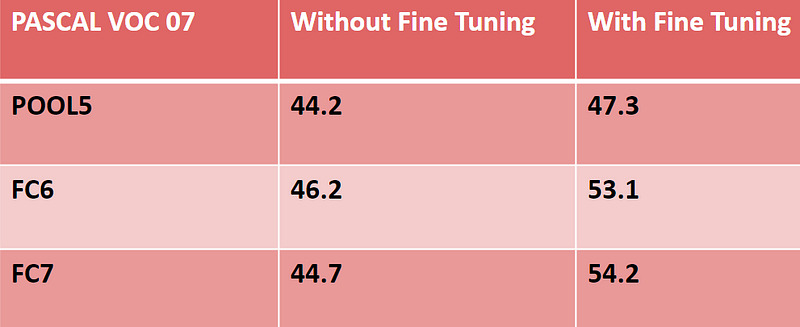

In [9]:
# Results obtained for RCNN with AlexNet on PASCAL VOC 2007 dataset

from IPython import display
display.Image("data/images/CV_08_RCNN-15.jpg")

Without fine-tuning, there was not much difference in the accuracy even if we add the Fully Connected Layers. This shows that most of the accuracy was achieved in the convolution layers itself and the fully connected layers were hardly adding any value. This needs to be taken into account because the model size of the convolutional layers is around **3.7 MB** whereas the Fully Connected Layers need around **192 MB**. We can imagine the amount of memory we can save by excluding the FC layers. However, the story turned when we fine-tune the network with the region proposals. Most of the weights were altered in the FC layers and by this, we can see a significant rise in the accuracy. Also, if we exclude the FC7 layer we get an accuracy of 53.1% which is just 1.1% less than to the addition of it. We can consider removing this as it accounts for **29%** of the total model size. But it isn't mandatory, as one can trade-off between time, size, and accuracy. If we need a much accurate model and we have time and space, we may consider including it for critical applications such as in the medical field where accuracy is more important.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Advantages & Disadvantages of RCNN Architecture

- **Advantages:**
    - With R-CNN, we've avoided the usage of Sliding Window technique and Image Pyramid
- **Disadvantages:**
    - Region proposals of different sizes
    - 2000 proposals per image is too large and involves huge computation
    - It is slow at test time as it needs to run a full forward pass of CNN for each region proposal (**9 times slower** than it's previous best performing model which is **Overfeat**)
    - It has a complex multi-stage training pipeline (Cross Entropy for training the Region Proposals, Training SVMs and BBox Regressors).
- **Solution:** To address the drawbacks of R-CNN, a year later **Fast R-CNN** was proposed which is **146 times faster** than RCNN.

**Note**

Overfeat is an Object Detection model that basically involves the use of convolution operations in place of FC layers and efficiently uses the sliding window concept.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)